In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linspace

In [3]:
# Load data
df = pd.read_excel("data_mastervorstudie_2022-05-02_20-22.xlsx")

In [4]:
df

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,AE01_01,AE01_02,AE02_01,AE03_01,...,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
0,Interview-Nummer (fortlaufend),Seriennummer (sofern verwendet),Referenz (sofern im Link angegeben),"Fragebogen, der im Interview verwendet wurde",Interview-Modus,Zeitpunkt zu dem das Interview begonnen hat (E...,Rsikoverhalten: Investition in Alternative A,Rsikoverhalten: Investition in Alternative B,Quelle: Erbe,ErbeRiskant: Alternative 2,...,Versandzeitpunkt der Einladungsmail (nur für n...,Zeitpunkt als der Datensatz das letzte mal geä...,Wurde die Befragung abgeschlossen (letzte Seit...,Hat der Teilnehmer den Fragebogen nur angesehe...,"Seite, die der Teilnehmer zuletzt bearbeitet hat","Letzte Seite, die im Fragebogen bearbeitet wurde",Anteil fehlender Antworten in Prozent,Anteil fehlender Antworten (gewichtet nach Rel...,Maluspunkte für schnelles Ausfüllen,Maluspunkte für schnelles Ausfüllen
1,195,NaN,NaN,base,interview,2022-04-30 13:57:52,NaN,NaN,NaN,NaN,...,NaN,2022-04-30 14:11:43,1,0,7,7,3,2,0.77,1
2,200,NaN,NaN,base,interview,2022-04-30 15:06:57,NaN,NaN,NaN,NaN,...,NaN,2022-04-30 15:14:07,1,0,7,7,0,0,1.85,93
3,202,NaN,NaN,base,interview,2022-04-30 15:28:14,NaN,NaN,NaN,NaN,...,NaN,2022-04-30 15:42:08,1,0,7,7,3,2,0.98,12
4,203,NaN,NaN,base,interview,2022-04-30 17:25:38,NaN,NaN,NaN,NaN,...,NaN,2022-04-30 17:35:34,1,0,7,7,0,0,1.34,18
5,204,NaN,NaN,base,interview,2022-04-30 18:09:21,NaN,NaN,NaN,NaN,...,NaN,2022-04-30 18:12:53,1,0,7,7,4,2,2.47,156
6,207,NaN,NaN,base,interview,2022-04-30 21:22:15,NaN,NaN,NaN,NaN,...,NaN,2022-04-30 21:46:16,1,0,7,7,0,0,0.41,0
7,208,NaN,NaN,base,interview,2022-04-30 21:25:18,NaN,NaN,NaN,NaN,...,NaN,2022-04-30 21:34:22,1,0,7,7,0,0,1.59,32
8,211,NaN,NaN,base,interview,2022-05-01 16:32:36,NaN,NaN,NaN,NaN,...,NaN,2022-05-01 16:44:52,1,0,7,7,4,2,0.75,1
9,212,NaN,NaN,base,interview,2022-05-01 16:39:31,NaN,NaN,NaN,NaN,...,NaN,2022-05-01 16:57:37,1,0,7,7,0,0,0.62,0


In [51]:
# Select Usefull columns
df = df[["CASE","STARTED","FS01","SD03","SD05","SD11","SD11_10","SD14","SD14_08", "SD16", "SD18_01","MZ01_01","SC01","SC02","VR01_01",
    "AN01_01","AN01_02","AN02_01","AN02_02","AN03_01","AN03_02","AN04_01"
    ,"AN04_02","RI01","RI02","RI03","RI04","RI05","RI06","RI07","RI08","RI09","RI10","RI11","RI12","RI13",
    "TIME_SUM","LASTDATA","FINISHED"]]

In [52]:
df_group1 = df[df["FS01"]==1]


In [53]:
df_group1[["AN01_01","AN01_02","AN02_01","AN02_02","AN03_01","AN03_02","AN04_01"
    ,"AN04_02"]]= df_group1[["AN01_01","AN01_02","AN02_01","AN02_02","AN03_01","AN03_02","AN04_01"
    ,"AN04_02"]] -1

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [84]:
means_group1 =pd.DataFrame(df_group1[["AN01_01","AN01_02","AN02_01","AN02_02","AN03_01","AN03_02","AN04_01"
    ,"AN04_02"]].mean()).dropna().transpose()

In [85]:
means_group1

,AN02_01,AN02_02,AN03_01,AN03_02,AN04_01,AN04_02
0,6.25,93.75,55.75,44.25,47.25,52.75


In [79]:
means_group1 = means_group1.rename(columns={0:"data"})

In [80]:
means_group1

,data
AN02_01,6.25
AN02_02,93.75
AN03_01,55.75
AN03_02,44.25
AN04_01,47.25
AN04_02,52.75


In [91]:
means_group1 = means_group1.rename(columns={"AN02_01": "Gespartes: Geld in Alternative A", "AN02_02": "Gespartes: Geld in Alternative B", "AN03_01": "Geerbtes: Geld in Alternative A", "AN03_02": "Geerbtes: Geld in Alternative B", "AN04_01": "Lotterie: Geld in Alternative A", "AN04_02": "Lotterie: Erspartes in Alternative B"})

In [101]:
means_group1.values.tolist()

[[6.25, 93.75, 55.75, 44.25, 47.25, 52.75]]

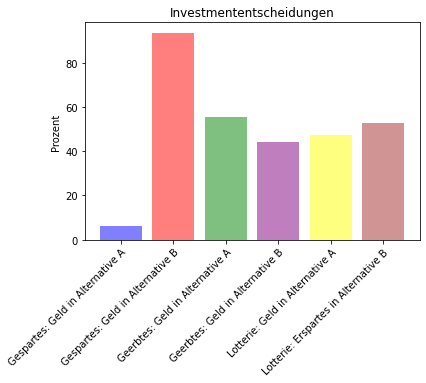

In [114]:
objects = means_group1.columns.to_list()
y_pos = np.arange(len(objects))
performance = means_group1.values.tolist()[0]
start = 0.0
stop = 1.0
number_of_lines= 1000
cm_subsection = linspace(start, stop, number_of_lines) 

colors = [ cm.jet(x) for x in cm_subsection ]

plt.bar(y_pos, performance, align='center', alpha=0.5,color=["blue","red","green","purple","yellow","brown"])
plt.xticks(y_pos, objects,rotation = 45,rotation_mode='anchor',ha='right')
plt.ylabel('Prozent')
plt.title('Investmententscheidungen')

plt.show()

In [115]:
df_group2 = df[df["FS01"]==2]
df_group2[["AN01_01","AN01_02","AN02_01","AN02_02","AN03_01","AN03_02","AN04_01"
    ,"AN04_02"]]= df_group2[["AN01_01","AN01_02","AN02_01","AN02_02","AN03_01","AN03_02","AN04_01"
    ,"AN04_02"]] -1
means_group2 =pd.DataFrame(df_group2[["AN01_01","AN01_02","AN02_01","AN02_02","AN03_01","AN03_02","AN04_01"
    ,"AN04_02"]].mean()).dropna().transpose()
means_group2 = means_group2.rename(columns={0:"data"})
means_group2 = means_group2.rename(columns={"AN02_01": "Gespartes: Geld in Alternative A", "AN02_02": "Gespartes: Geld in Alternative B", "AN03_01": "Geerbtes: Geld in Alternative A", "AN03_02": "Geerbtes: Geld in Alternative B", "AN04_01": "Lotterie: Geld in Alternative A", "AN04_02": "Lotterie: Erspartes in Alternative B"})


C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


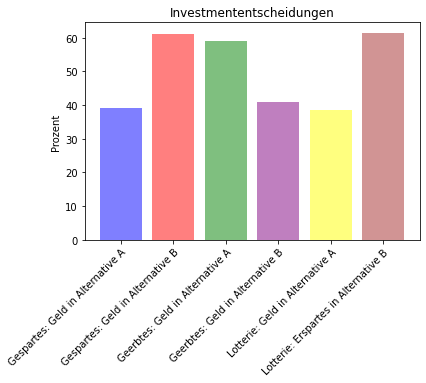

In [116]:
objects = means_group2.columns.to_list()
y_pos = np.arange(len(objects))
performance = means_group2.values.tolist()[0]
start = 0.0
stop = 1.0
number_of_lines= 1000
cm_subsection = linspace(start, stop, number_of_lines) 

colors = [ cm.jet(x) for x in cm_subsection ]

plt.bar(y_pos, performance, align='center', alpha=0.5,color=["blue","red","green","purple","yellow","brown"])
plt.xticks(y_pos, objects,rotation = 45,rotation_mode='anchor',ha='right')
plt.ylabel('Prozent')
plt.title('Investmententscheidungen')

plt.show()